In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [3]:
full = pd.read_csv('../Data/cleaned_full.csv')

# Modeling

## Train/Test Split

In [4]:
X = full['title'].values.astype('U')
y = full['subreddit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Baseline Score

In [6]:
y_train.value_counts(normalize=True)

MMA       0.517876
Boxing    0.482124
Name: subreddit, dtype: float64

## Count Vectorizer LR Pipeline

In [7]:
cvect= CountVectorizer()

In [8]:
pipecvectlog = Pipeline([
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression(max_iter= 10000))
])

In [9]:
pipecvectlog.fit(X_train, y_train)
pipecvectlog.score(X_train, y_train), pipecvectlog.score(X_test, y_test)

(0.9708302169035153, 0.8752803947958726)

In [10]:
cross_val_score(pipecvectlog, X_train, y_train, cv=5), cross_val_score(pipecvectlog, X_test, y_test, cv=5)

(array([0.86163052, 0.86237846, 0.88107704, 0.86387435, 0.87808527]),
 array([0.84529148, 0.867713  , 0.85426009, 0.85874439, 0.86292135]))

In [11]:
cross_val_score(pipecvectlog, X_train, y_train, cv=10).mean(), cross_val_score(pipecvectlog, X_test, y_test, cv=10).mean()

(0.8703071435604128, 0.8550660525996848)

## Count Vectorizer NB Pipeline

In [12]:
pipecvectnb = Pipeline([
    ('cv', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [13]:
pipecvectnb.fit(X_train, y_train)
pipecvectnb.score(X_train, y_train), pipecvectnb.score(X_test, y_test)

(0.9455497382198953, 0.8833557649170032)

In [14]:
cross_val_score(pipecvectnb, X_train, y_train, cv=5), cross_val_score(pipecvectnb, X_test, y_test, cv=5)

(array([0.85639491, 0.88032909, 0.89304413, 0.88182498, 0.89827973]),
 array([0.83632287, 0.89013453, 0.84753363, 0.8632287 , 0.87191011]))

In [15]:
cross_val_score(pipecvectnb, X_train, y_train, cv=10).mean(), cross_val_score(pipecvectnb, X_test, y_test, cv=10).mean()

(0.882578341075696, 0.8654062133882761)

## Count Vectorizer KNN Pipeline

In [16]:
knn = KNeighborsClassifier()

In [17]:
pipecvectcvknn = Pipeline([
    ('cv', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [18]:
pipecvectcvknn.fit(X_train, y_train)
pipecvectcvknn.score(X_train, y_train), pipecvectcvknn.score(X_test, y_test)

(0.8700074794315632, 0.7649170031404217)

In [19]:
cross_val_score(pipecvectcvknn, X_train, y_train, cv=5), cross_val_score(pipecvectcvknn, X_test, y_test, cv=5)

(array([0.75691847, 0.74495138, 0.77786088, 0.76664174, 0.7591623 ]),
 array([0.71300448, 0.69282511, 0.70627803, 0.69955157, 0.71685393]))

In [20]:
cross_val_score(pipecvectcvknn, X_train, y_train, cv=10).mean(), cross_val_score(pipecvectcvknn, X_test, y_test, cv=5).mean()

(0.7661985446148062, 0.7057026250818763)

## TFIDF KNN Pipeline

In [21]:
pipetfidfknn = Pipeline([
    ('td', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [22]:
pipetfidfknn.fit(X_train, y_train)
pipetfidfknn.score(X_train, y_train), pipetfidfknn.score(X_test, y_test)

(0.8617801047120419, 0.6702557200538358)

In [23]:
cross_val_score(pipetfidfknn, X_train, y_train, cv=5), cross_val_score(pipetfidfknn, X_test, y_test, cv=5)

(array([0.78982797, 0.76065819, 0.63275991, 0.66641735, 0.67688856]),
 array([0.81390135, 0.77578475, 0.74663677, 0.81838565, 0.81123596]))

In [24]:
cross_val_score(pipetfidfknn, X_train, y_train, cv=10).mean(), cross_val_score(pipetfidfknn, X_test, y_test, cv=10).mean()

(0.704834725168497, 0.8057386983395952)

## TFIDF LR Pipeline

In [25]:
tfidf = TfidfVectorizer()

In [26]:
pipetfidflog = Pipeline([
    ('td', TfidfVectorizer()),
    ('lr', LogisticRegression(max_iter= 10000))
])

In [27]:
pipetfidflog.fit(X_train, y_train)
pipetfidflog.score(X_train, y_train), pipetfidflog.score(X_test, y_test)

(0.9534779356768885, 0.8788694481830417)

In [28]:
cross_val_score(pipetfidflog, X_train, y_train, cv=5), cross_val_score(pipetfidflog, X_test, y_test, cv=5)

(array([0.86237846, 0.87284966, 0.89154824, 0.87284966, 0.87958115]),
 array([0.82735426, 0.87443946, 0.85874439, 0.86995516, 0.86292135]))

In [29]:
cross_val_score(pipetfidflog, X_train, y_train, cv=10).mean(), cross_val_score(pipetfidflog, X_test, y_test, cv=10).mean()

(0.8758447231098341, 0.8627055306427505)

## TFIDF NB Pipeline

In [30]:
pipetfidfnb = pipetfidflog = Pipeline([
    ('td', TfidfVectorizer(max_features = 10000)),
    ('nb', MultinomialNB())
])

In [31]:
pipetfidfnb.fit(X_train, y_train)
pipetfidfnb.score(X_train, y_train), pipetfidfnb.score(X_test, y_test)

(0.949738219895288, 0.8784208165096455)

In [32]:
cross_val_score(pipetfidfnb, X_train, y_train, cv=5), cross_val_score(pipetfidfnb, X_test, y_test, cv=5)

(array([0.86013463, 0.88032909, 0.89005236, 0.87060583, 0.89229619]),
 array([0.84080717, 0.88565022, 0.84529148, 0.85650224, 0.86741573]))

In [33]:
cross_val_score(pipetfidfnb, X_train, y_train, cv=10).mean(), cross_val_score(pipetfidfnb, X_test, y_test, cv=10).mean()

(0.8813814075884107, 0.8649537429806488)

### The best models that performed about the same were the NB and LR with CV and TFIDF, KNN classifier did all around worse. Ill choose to focus performance on the TFIDF and CV with LR

# GridSearch

#### Param list

In [34]:
cvlrparams = {
    'cv__ngram_range':[(1,1),(1,2)],
    'lr__C': [.01, .1, 1, 10, 100]
}

In [35]:
tfidfparams = {
    'td__ngram_range':[(1,1),(1,2)],
    'lr__C': [.01, .1, 1, 10, 100]
}

In [36]:
cvnbparams = {
    'cv__ngram_range':[(1,1),(1,2)],
    'nb__alpha': [.01, .1, 1, 10, 100]
}

## Gridsearch score

#### Count Vectorizer

In [37]:
cvlrgrid = GridSearchCV(pipecvectlog, param_grid = cvlrparams)
cvlrgrid.fit(X_train, y_train)
cvlrgrid.best_params_

{'cv__ngram_range': (1, 2), 'lr__C': 0.1}

In [38]:
cvgridmodel = cvlrgrid.best_estimator_
cvgridmodel.score(X_train, y_train), cvgridmodel.score(X_test, y_test)

(0.9596110695587136, 0.8784208165096455)

In [39]:
cross_val_score(cvgridmodel, X_train, y_train, cv=5), cross_val_score(cvgridmodel, X_test, y_test, cv=5)

(array([0.86387435, 0.87434555, 0.88332087, 0.87135378, 0.88257292]),
 array([0.82959641, 0.87892377, 0.85201794, 0.867713  , 0.85617978]))

#### TFIDF

In [40]:
tfidflrgrid = GridSearchCV(pipetfidflog, param_grid = tfidfparams)
tfidflrgrid.fit(X_train, y_train)
tfidflrgrid.best_params_

ValueError: Invalid parameter lr for estimator Pipeline(steps=[('td', TfidfVectorizer(max_features=10000)),
                ('nb', MultinomialNB())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
tdlrgridmodel = tfidflrgrid.best_estimator_
tdlrgridmodel.score(X_train, y_train), tdlrgridmodel.score(X_test, y_test)

In [ ]:
cross_val_score(tdlrgridmodel, X_train, y_train, cv=5), cross_val_score(tdlrgridmodel, X_test, y_test, cv=5)

#### Count Vectorizer Naive Bayes

In [41]:
cvnbgrid = GridSearchCV(pipecvectnb, param_grid = cvnbparams)
cvnbgrid.fit(X_train, y_train)
cvnbgrid.best_params_

{'cv__ngram_range': (1, 2), 'nb__alpha': 1}

In [42]:
cvnbmodel = cvnbgrid.best_estimator_
cvnbmodel.score(X_train, y_train), cvnbmodel.score(X_test, y_test)

(0.9763649962602842, 0.8909825033647375)

In [43]:
cross_val_score(cvnbmodel, X_train, y_train, cv=5), cross_val_score(cvnbmodel, X_test, y_test, cv=5)

(array([0.85564697, 0.87808527, 0.89753179, 0.88107704, 0.89902767]),
 array([0.86098655, 0.89461883, 0.85650224, 0.85650224, 0.86292135]))

# Count Vectorizer/LR Coef Exploration

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
np.unique(y, return_counts=True)

(array(['Boxing', 'MMA'], dtype=object), array([4294, 4620], dtype=int64))

In [46]:
coefs = pipecvectlog.named_steps['lr'].coef_

In [47]:
coef_df = pd.DataFrame({'coefs': coefs[0]}, index = pipecvectlog.named_steps['cv'].get_feature_names())

In [62]:
mmma = coef_df.nlargest(25, 'coefs')

In [63]:
mmma

,coefs
mma,3.656566
ufc,3.270893
khabib,2.574053
rizin,2.167573
bellator,2.100501
perry,2.037542
bisping,1.995610
dana,1.940365
jon,1.930889
diaz,1.830134


In [64]:
mbox = coef_df.nsmallest(25, 'coefs').abs()

In [65]:
mbox

,coefs
canelo,2.814437
boxer,2.683225
boxing,2.664409
tyson,2.462939
robinson,2.415093
garcia,2.224066
jr,2.214596
mayweather,1.987092
fury,1.799408
dazn,1.763880


In [66]:
mbox.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, canelo to holyfield
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   coefs   25 non-null     float64
dtypes: float64(1)
memory usage: 400.0+ bytes


## Checking for coeficients, what did the graph say was the most important?

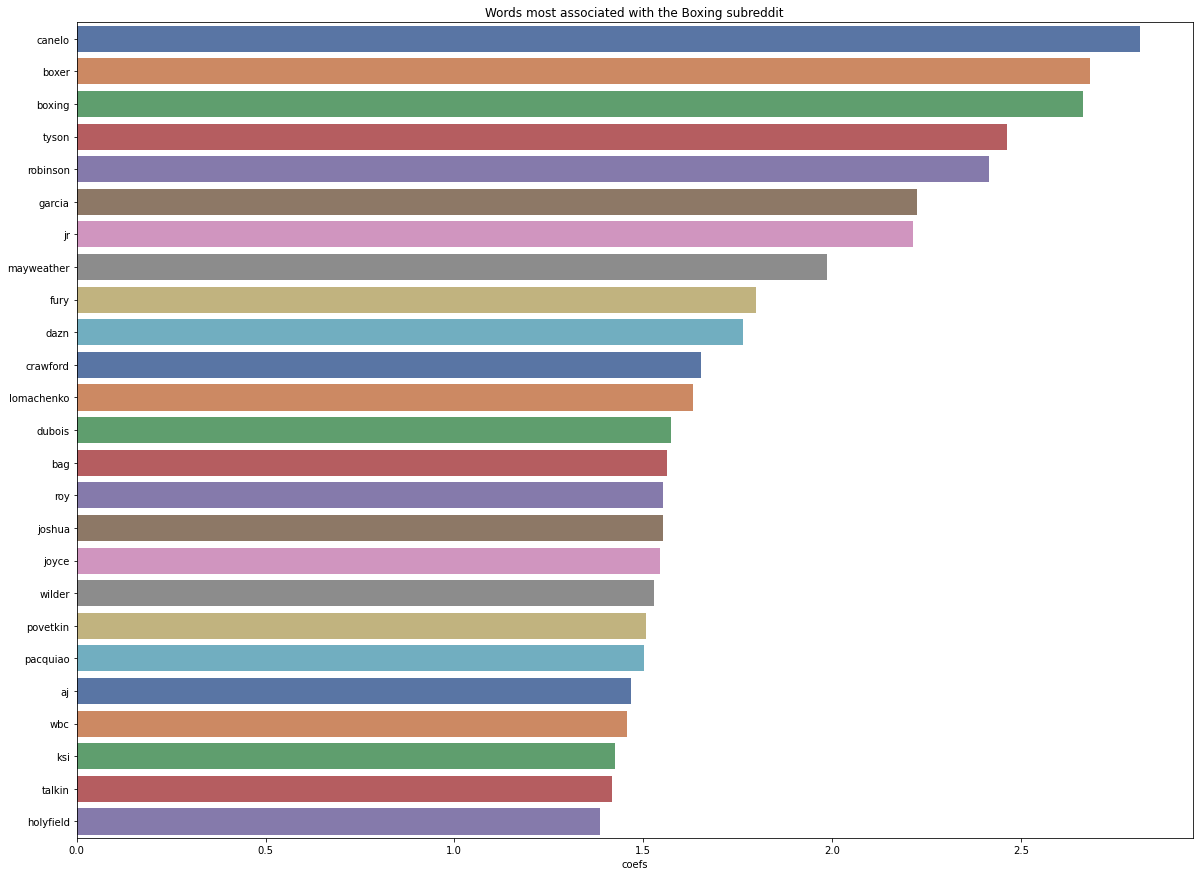

In [78]:
plt.figure(figsize=(20,15))
sns.barplot(x='coefs', y=mbox.index, data=mbox[:25], palette='deep', orient='h')
plt.title('Words most associated with the Boxing subreddit');

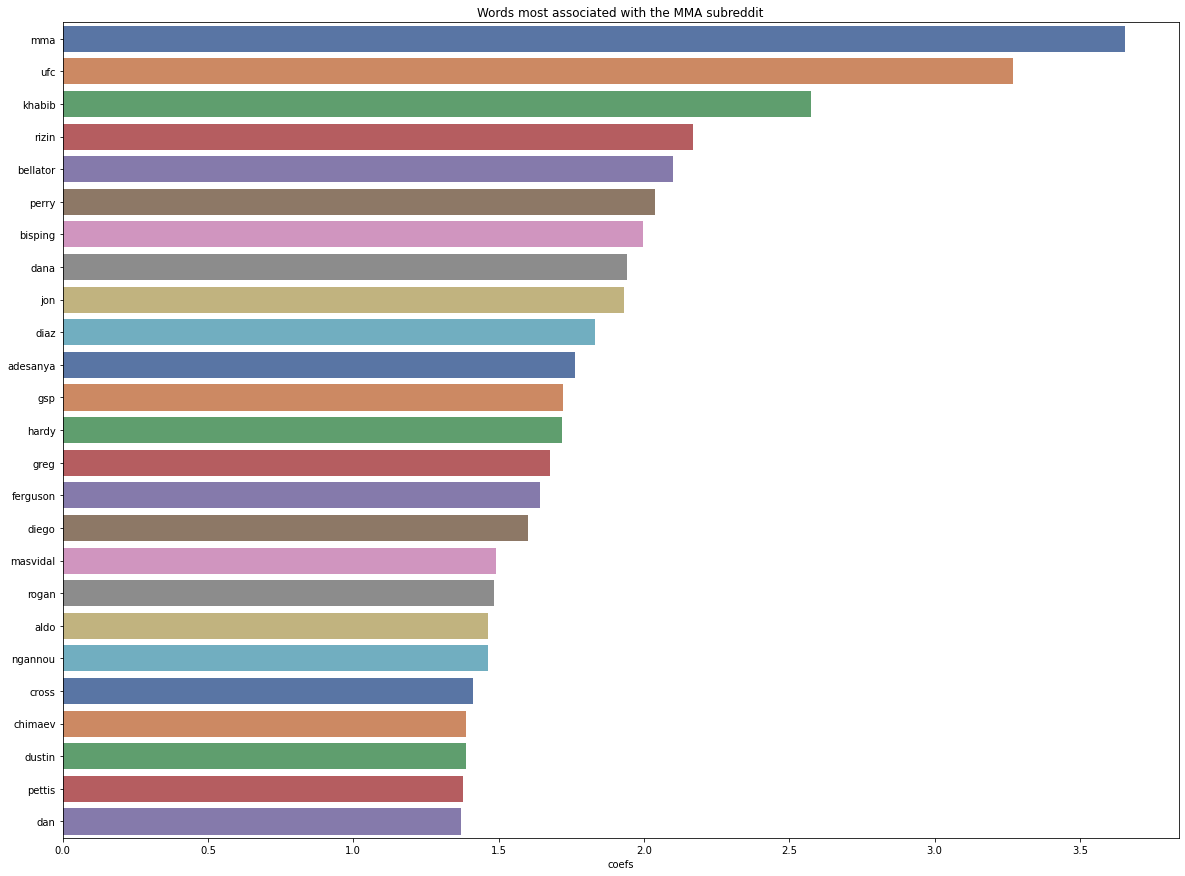

In [79]:
plt.figure(figsize=(20,15))
sns.barplot(x='coefs', y=mmma.index, data=mmma[:25], palette='deep', orient='h')
plt.title('Words most associated with the MMA subreddit');

# NB Probabilities Exploration

In [71]:
nb_prob_box = pd.DataFrame({'probability':pipecvectnb.named_steps['nb'].feature_log_prob_[0]}, index = pipecvectnb.named_steps['cv'].get_feature_names())

In [72]:
nb_prob_mma = pd.DataFrame({'probability':pipecvectnb.named_steps['nb'].feature_log_prob_[1]}, index = pipecvectnb.named_steps['cv'].get_feature_names())

In [73]:
prob_mma = nb_prob_mma.nlargest(25, 'probability')

In [74]:
prob_box = nb_prob_box.nlargest(25, 'probability')

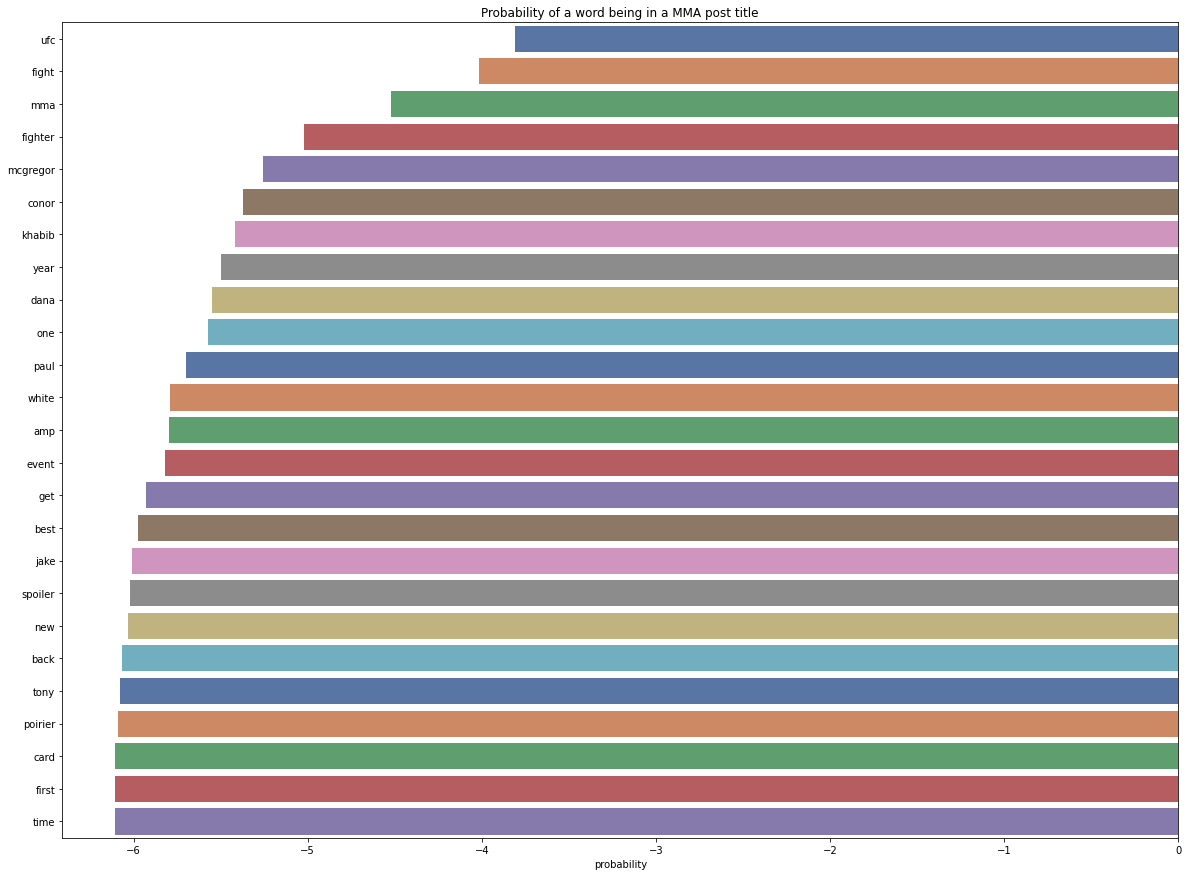

In [80]:
plt.figure(figsize=(20,15))
sns.barplot(x='probability', y=prob_mma.index, data=prob_mma[:25], palette='deep', orient='h')
plt.title('Probability of a word being in a MMA post title');

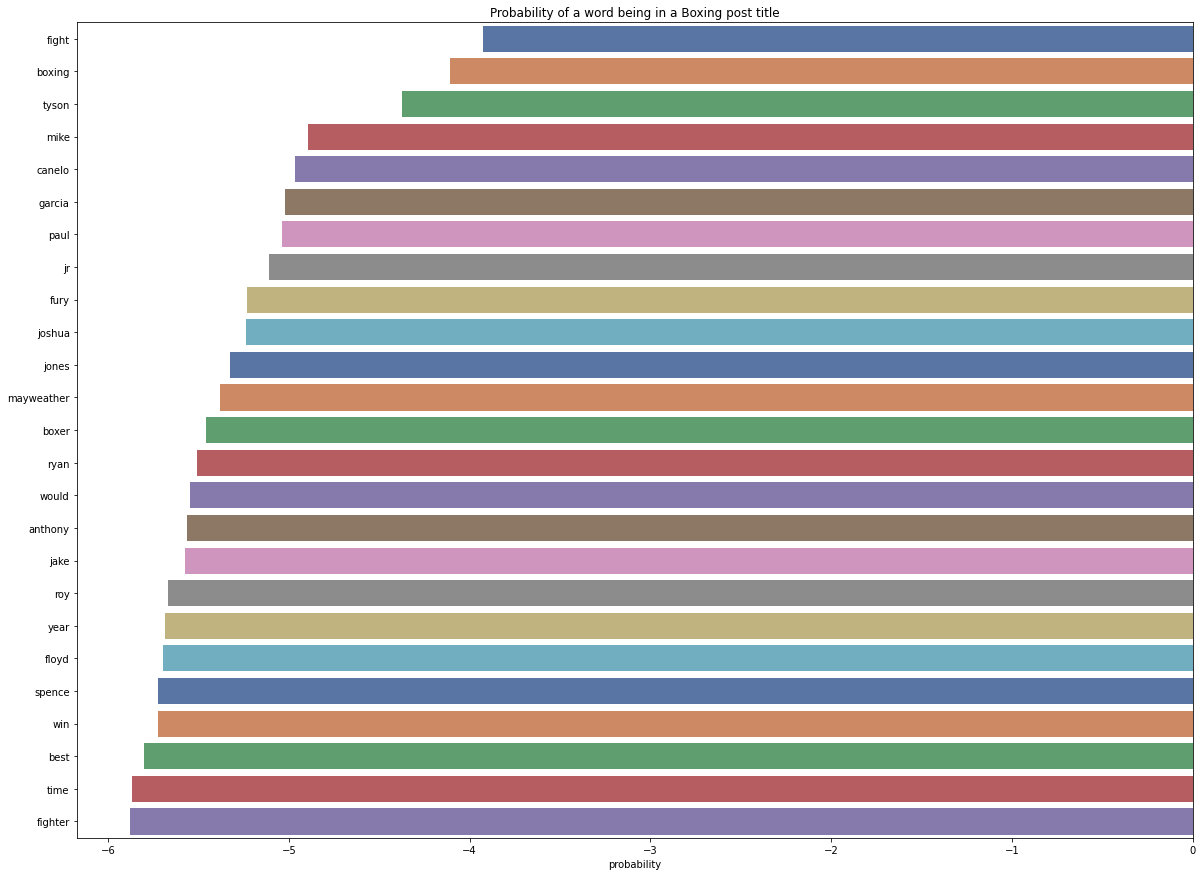

In [81]:
plt.figure(figsize=(20,15))
sns.barplot(x='probability', y=prob_box.index, data=prob_box[:25], palette='deep', orient='h')
plt.title('Probability of a word being in a Boxing post title');